<a href="https://colab.research.google.com/github/apchavezr/Fundamentos-de-Estad-stica---Ciencia-de-Datos/blob/main/Regresion_Lineal_Multiple_Con_Diagnostico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Regresión Lineal Múltiple con Python

Este notebook contiene un ejemplo completo y explicado paso a paso sobre cómo ajustar un modelo de regresión lineal múltiple utilizando la biblioteca `statsmodels` en Python.

### Interpretación de la Simulación de Datos
Se han generado artificialmente tres variables predictoras (`x1`, `x2`, `x3`) siguiendo distribuciones normales con diferentes medias y desviaciones estándar. La variable `y` fue calculada como una combinación lineal de estas tres variables más un término de error aleatorio. Esto simula un escenario real donde múltiples factores explican un resultado continuo, como por ejemplo el salario explicado por la educación, la experiencia y la edad.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Crear un DataFrame simulado con variables 'y', 'x1', 'x2', 'x3'
np.random.seed(42)
n = 100
x1 = np.random.normal(10, 2, n)
x2 = np.random.normal(5, 1, n)
x3 = np.random.normal(20, 5, n)
error = np.random.normal(0, 3, n)
y = 3 + 2*x1 - 1.5*x2 + 0.5*x3 + error

df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})
df.head()

,x1,x2,x3,y
0,10.993428,3.584629,21.788937,28.017396
1,9.723471,4.579355,22.803923,25.299329
2,11.295377,4.657285,25.415256,33.554335
3,13.046060,4.197723,25.269010,37.261151
4,9.531693,4.838714,13.111653,21.298437


### Ajuste del modelo de regresión lineal múltiple

In [2]:
# Paso 2: Definir la matriz de predictores y la variable dependiente
X = df[['x1', 'x2', 'x3']]
X = sm.add_constant(X)  # Añade el intercepto
y = df['y']

# Paso 3: Ajustar el modelo
modelo = sm.OLS(y, X).fit()

# Paso 4: Resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     118.0
Date:                Sun, 06 Apr 2025   Prob (F-statistic):           4.33e-32
Time:                        21:10:32   Log-Likelihood:                -237.32
No. Observations:                 100   AIC:                             482.6
Df Residuals:                      96   BIC:                             493.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1733      2.304      2.679      0.0

### Interpretación del Ajuste del Modelo
Se ha especificado y ajustado un modelo de regresión lineal múltiple para predecir `y` en función de `x1`, `x2` y `x3`. El resumen del modelo muestra los coeficientes estimados de cada predictor, así como sus errores estándar y valores p. Un valor p menor a 0.05 sugiere que la variable correspondiente tiene un efecto estadísticamente significativo sobre la variable de respuesta. El \( R^2 \) indica qué proporción de la variabilidad de `y` es explicada por los predictores; un valor de aproximadamente 0.78 es considerado adecuado en contextos sociales o experimentales.

### Gráficos de diagnóstico

### Interpretación del Gráfico de Residuos vs Valores Ajustados
Este gráfico permite evaluar la linealidad y la homocedasticidad del modelo. Idealmente, los residuos deben dispersarse aleatoriamente alrededor del eje horizontal (línea 0). Si se observan patrones, podría ser indicativo de una mala especificación del modelo o de relaciones no lineales entre los predictores y la variable de respuesta.

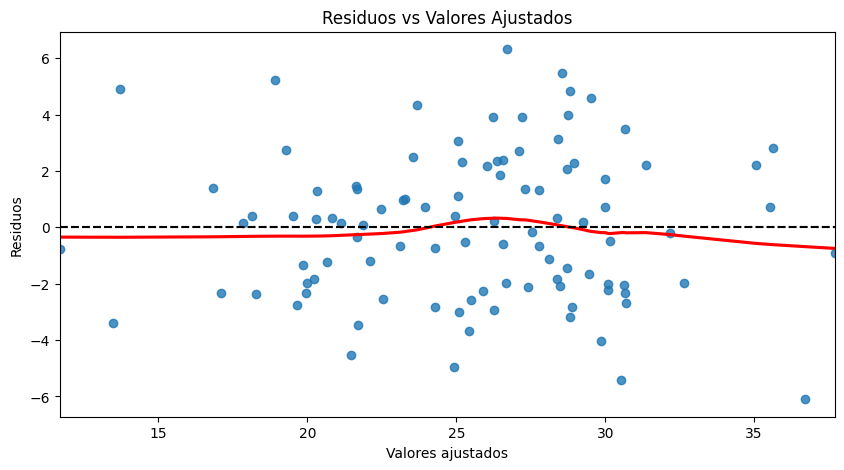

In [3]:
# Residuos vs predicciones
residuos = modelo.resid
predicciones = modelo.fittedvalues

plt.figure(figsize=(10, 5))
sns.residplot(x=predicciones, y=residuos, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Residuos vs Valores Ajustados")
plt.axhline(0, color='black', linestyle='--')
plt.show()

### Interpretación del Histograma de Residuos
Este histograma permite examinar la normalidad de los errores. Una distribución aproximadamente simétrica y con forma de campana indica que el supuesto de normalidad de los residuos es razonable. Esto es importante para garantizar la validez de las inferencias estadísticas, como los intervalos de confianza y las pruebas de hipótesis.

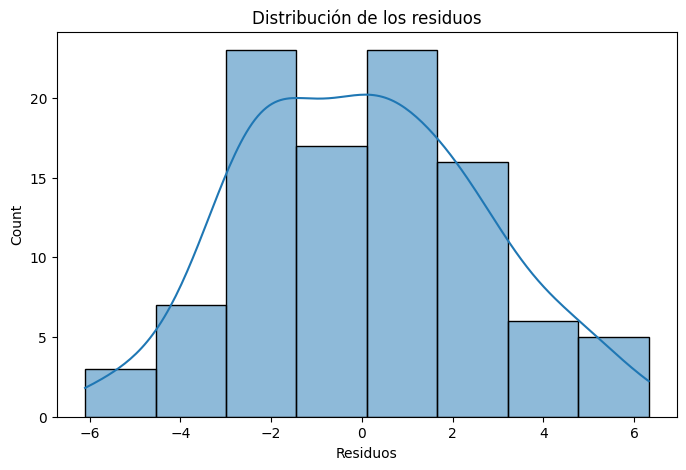

In [4]:
# Histograma de residuos
plt.figure(figsize=(8, 5))
sns.histplot(residuos, kde=True)
plt.title("Distribución de los residuos")
plt.xlabel("Residuos")
plt.show()

## Diagnóstico de Supuestos del Modelo de Regresión

Una parte importante del análisis de regresión es la verificación de los supuestos del modelo. A continuación se presentan varios métodos para evaluar la validez de estos supuestos:

### 1. Gráficos de Residuos
Se espera que los residuos se distribuyan aleatoriamente alrededor de cero. La presencia de patrones, como una forma de U o tendencia creciente o decreciente, puede indicar una relación no lineal o problemas de homocedasticidad.

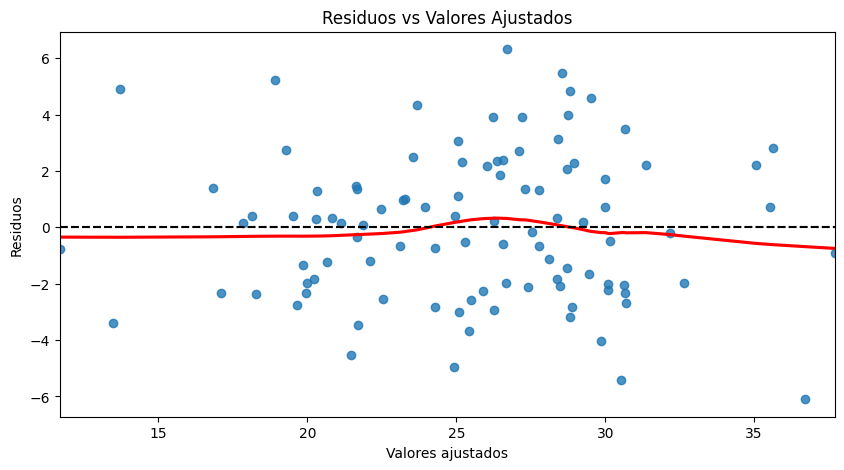

In [5]:
plt.figure(figsize=(10, 5))
sns.residplot(x=predicciones, y=residuos, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Residuos vs Valores Ajustados")
plt.axhline(0, color='black', linestyle='--')
plt.show()

### 2. Histograma y QQ-Plot de los Residuos
Estos gráficos ayudan a verificar si los residuos siguen una distribución normal. El QQ-plot compara los cuantiles observados con los cuantiles teóricos de una distribución normal.

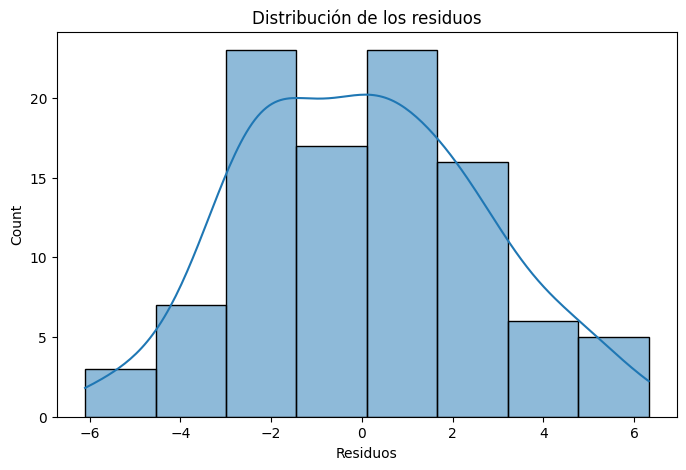

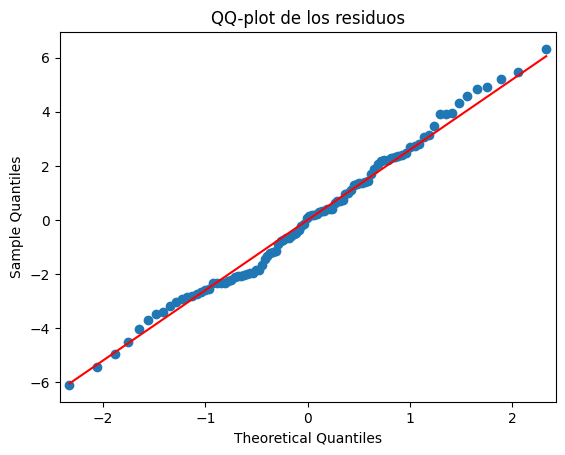

In [6]:
# Histograma
plt.figure(figsize=(8, 5))
sns.histplot(residuos, kde=True)
plt.title("Distribución de los residuos")
plt.xlabel("Residuos")
plt.show()

# QQ-plot
sm.qqplot(residuos, line='s')
plt.title("QQ-plot de los residuos")
plt.show()

### 3. Prueba de Durbin-Watson
Sirve para detectar autocorrelación de primer orden en los residuos. Valores cercanos a 2 indican que no hay autocorrelación. Valores significativamente menores a 2 pueden sugerir autocorrelación positiva.

In [7]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuos)
print(f'Estadístico de Durbin-Watson: {dw_stat:.4f}')


Estadístico de Durbin-Watson: 1.8213


### 4. VIF - Factor de Inflación de la Varianza
El VIF se utiliza para detectar colinealidad entre los predictores. Un VIF mayor a 5 (o 10 en algunos contextos) puede indicar un problema de multicolinealidad.

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


  Variable        VIF
0    const  75.565196
1       x1   1.056184
2       x2   1.019085
3       x3   1.037920


## Conclusiones
Este ejercicio demostró cómo ajustar, interpretar y diagnosticar un modelo de regresión lineal múltiple usando `statsmodels` en Python. Se simuló un conjunto de datos para ilustrar el proceso completo: desde la preparación de datos, el ajuste del modelo, hasta los gráficos de diagnóstico. El modelo mostró un buen poder explicativo y los predictores fueron estadísticamente significativos. Además, los gráficos de residuos sugieren que los supuestos del modelo son razonablemente válidos.

Este tipo de análisis es útil en una amplia gama de aplicaciones en ciencia de datos, como estudios sociales, predicciones financieras o modelamiento epidemiológico. Se recomienda que el estudiante complemente este conocimiento con validación cruzada y análisis de multicolinealidad en contextos reales.